### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
X, y = make_classification(n_samples=2000,n_features=20, n_classes=2, weights=[1,1], random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
X_train

array([[-0.75998411, -0.49126262,  0.76271497, ..., -0.77675707,
         1.17319848, -1.53209965],
       [-0.58698003, -0.72766324,  0.63625216, ...,  0.76966335,
        -0.77126024, -2.21043307],
       [ 0.59033392, -0.77889412,  0.91109297, ..., -0.08058108,
         1.98658772,  0.80060833],
       ...,
       [-0.6538363 ,  2.08249262, -2.80156222, ...,  1.00426999,
        -1.46456753, -0.14711512],
       [ 0.61103144, -0.79885571,  0.47140242, ...,  0.1564904 ,
        -1.27240791, -0.98060547],
       [ 0.93982628,  0.9259377 ,  0.75681379, ..., -0.12996483,
         0.41394768, -0.31362399]])

### Random Forests

In [12]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9805388888888887


In [13]:
ytrain_pred

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.3 , 0.7 ]])

In [14]:
ytest_pred

array([[0.04, 0.96],
       [0.99, 0.01],
       [0.03, 0.97],
       ...,
       [0.01, 0.99],
       [0.99, 0.01],
       [0.01, 0.99]])

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [20]:
ytrain_pred

array([[9.99688479e-01, 3.11520635e-04],
       [9.99966000e-01, 3.39995695e-05],
       [2.09976771e-02, 9.79002323e-01],
       ...,
       [8.58463348e-01, 1.41536652e-01],
       [9.99422335e-01, 5.77665099e-04],
       [6.07714035e-01, 3.92285965e-01]])

### Adaboost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNNClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [30]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9843888888888889


In [31]:
final_prediction

0      0.877762
1      0.118323
2      0.818783
3      0.757853
4      0.552447
         ...   
595    0.123840
596    0.115345
597    0.876697
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [55]:
### Calculate the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

In [56]:
thresholds

array([1.9134413 , 0.9134413 , 0.90906694, 0.90827475, 0.81420464,
       0.8130558 , 0.79764532, 0.79662833, 0.78877646, 0.78821156,
       0.76820853, 0.76787124, 0.7341922 , 0.73387362, 0.72347083,
       0.71893711, 0.66256113, 0.66243537, 0.60744697, 0.59175354,
       0.58327749, 0.57614346, 0.56838469, 0.56050386, 0.54808969,
       0.54639283, 0.54595371, 0.54127948, 0.53865858, 0.51616892,
       0.4546034 , 0.41341982, 0.39879719, 0.35386723, 0.34586612,
       0.2321341 , 0.23140421, 0.2219954 , 0.22146893, 0.20352808,
       0.19848417, 0.11783548, 0.1178351 , 0.10632697])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.454603,0.961667
29,0.516169,0.958333
28,0.538659,0.958333
27,0.541279,0.958333
25,0.546393,0.958333


In [59]:
accuracy_ls

,thresholds,accuracy
30,0.454603,0.961667
29,0.516169,0.958333
28,0.538659,0.958333
27,0.541279,0.958333
25,0.546393,0.958333
26,0.545954,0.956667
24,0.548090,0.956667
31,0.413420,0.955000
23,0.560504,0.955000
22,0.568385,0.953333


In [60]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

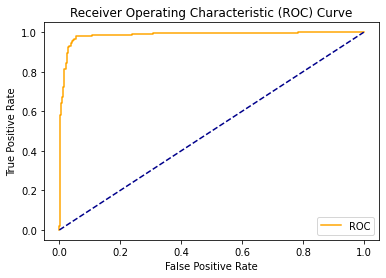

In [61]:
plot_roc_curve(fpr,tpr)